### Import Libraries

In [113]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.utils import resample
from model_scoring import scoring

### Import Scaler

In [114]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!")

scaler = load("scaler.pickle")

data = pd.read_csv('cleaned_data.csv')

X = data.drop(['Bankrupt?'], axis=1)
y = data['Bankrupt?']

### Oversampling

In [115]:
X_train_scaled = scaler.fit(X)
X_train_norm = pd.DataFrame(X_train_scaled.transform(X), columns=X.columns)

train = pd.concat([X_train_norm, y], axis=1)

In [116]:
#  Oversampling

yes_bankrupt = train[train['Bankrupt?']==1]
no_bankrupt = train[train['Bankrupt?']==0]

yes_bankrupt_oversampled = resample(
    yes_bankrupt,
    replace=True,
    n_samples=len(no_bankrupt),
    random_state=0,
)

train_oversampled = pd.concat([no_bankrupt,yes_bankrupt_oversampled],axis=0).dropna()

In [117]:
y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop(['Bankrupt?'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X_train_over, y_train_over, test_size=.25, random_state=42)

In [118]:
clf = svm.SVC().fit(X_train, y_train)
clf.score(X_train, y_train)

0.9162457062032734

'The accuracy score of the model is: 0.9133333333333333 '
'The precision score of the model is: 0.8841324200913242 '
'The recall score of the model is: 0.9491421568627451 '
'The ROC AUC score of the model is: 0.9137197594865285 '


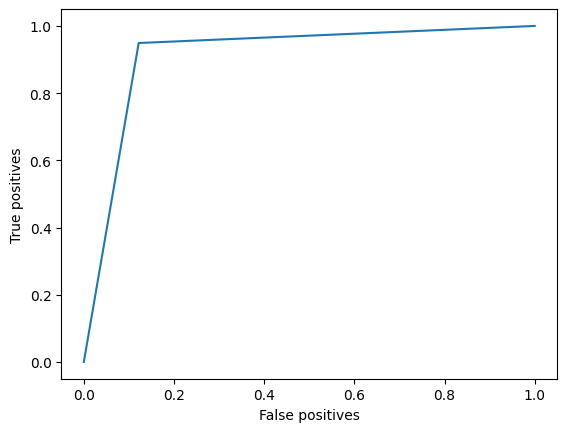

In [119]:
y_pred = clf.predict(X_test)
scoring(y_test,y_pred)